In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Menampilkan 5 baris pertama dari dataset
print(data.head())

# Select fitur-fitur penting
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

data = data[selected_features]

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
# Select fitur-fitur penting
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

data = data[selected_features]

# Menghilangkan nilai null
data.dropna(inplace=True)

# Convert data non-numerik menjadi numerik
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['work_type'] = data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural': 0})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked': 1, 'never smoked': 0, 'smokes': 2, 'Unknown': 3})

# Split data menjadi dua subset yaitu trainingData (80%) dan testingData (20%)
X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Normalisasi fitur agar skala semua fitur sama dan stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melatih model dengan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Menghasilkan prediksi dengan dataset testing
y_pred = model.predict(X_test)

# Mengevaluasi akurasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print

("\nClassification Report:\n", classification_report(y_test, y_pred))

# Menghitung nilai akurasi menggunakan accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Cetak nilai akurasi dengan format persen dan dua angka desimal
print("\nAccuracy Score: {:.2%}".format(accuracy))


Confusion Matrix:
 [[929   0]
 [ 53   0]]

Accuracy Score: 94.60%


c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

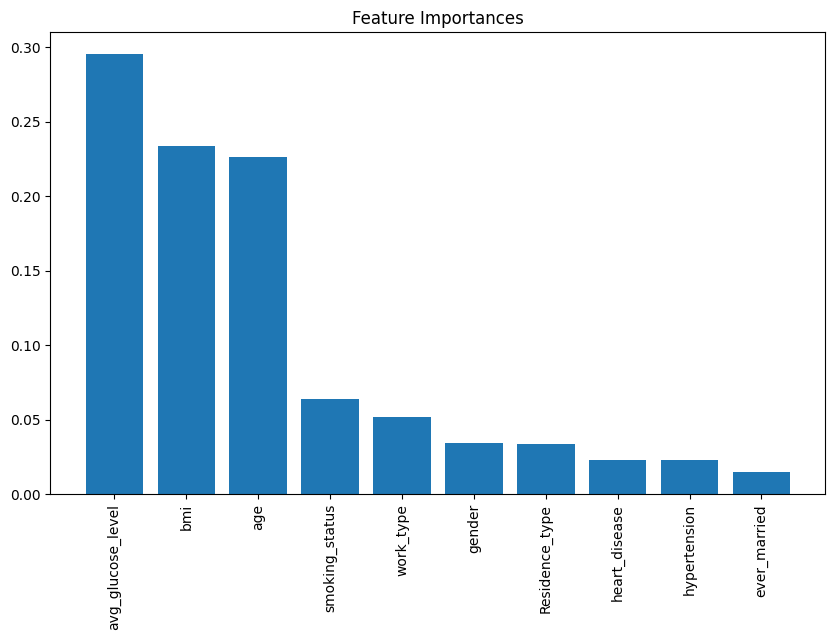

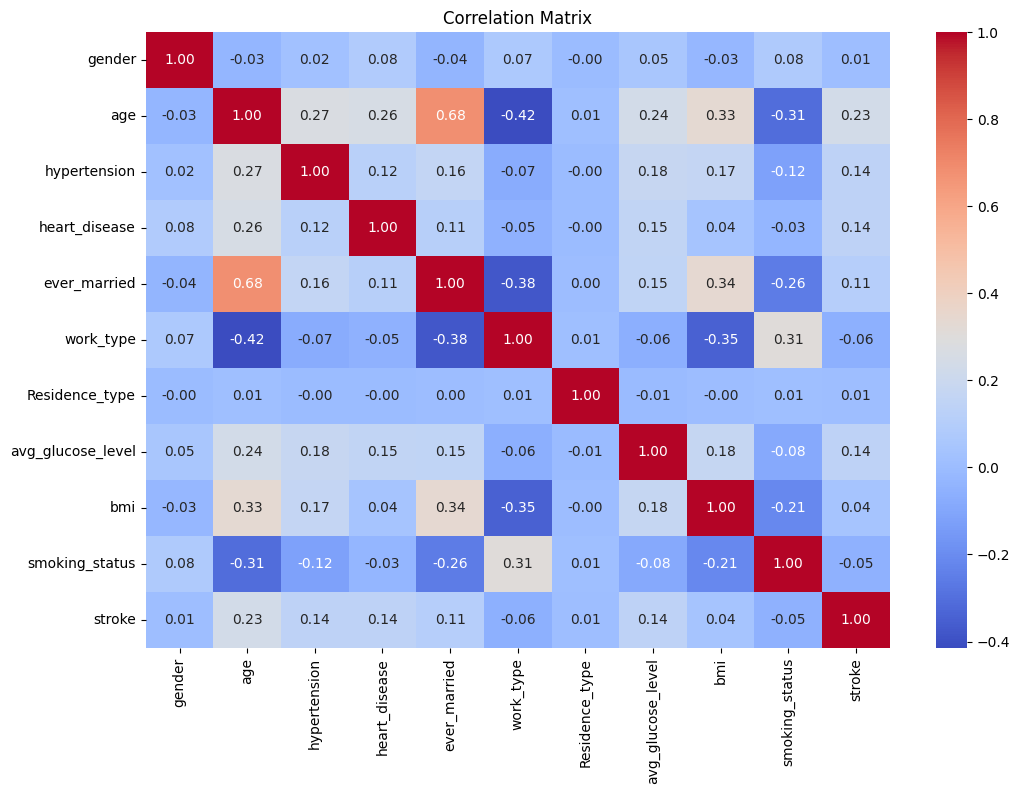

In [7]:
# Visualisasi pentingnya fitur
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Menghilangkan kategori 'Other' dari kolom 'gender'
data = data[data['gender'] != 2]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

# Heatmap untuk korelasi fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

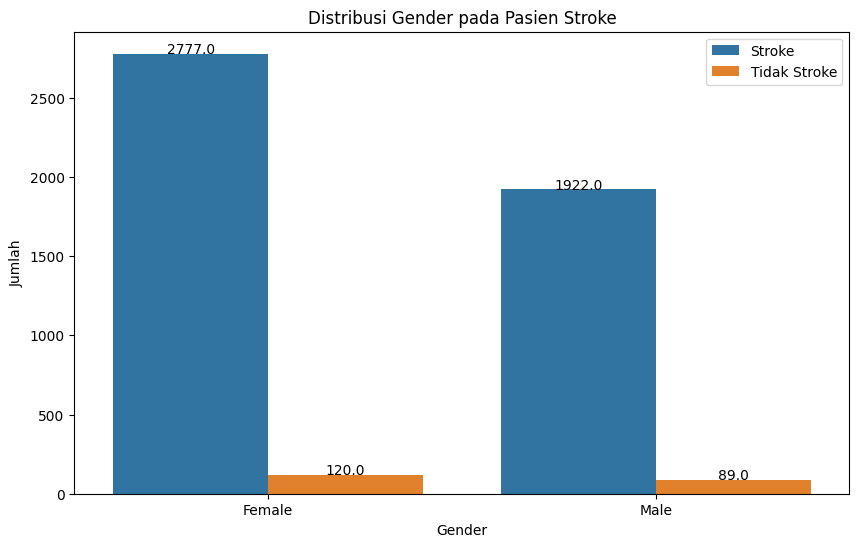

In [8]:
# Plotting distribusi gender dengan jumlah pasien stroke
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='stroke', data=data, hue_order=[0, 1])
plt.title('Distribusi Gender pada Pasien Stroke')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(loc='upper right', labels=['Stroke', 'Tidak Stroke'])

# Anotasi jumlah pasien stroke di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

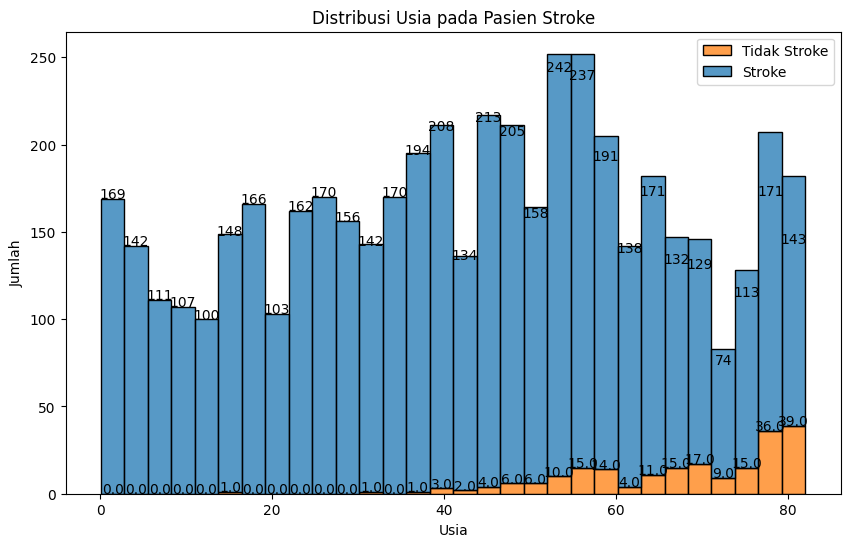

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='age', hue='stroke', multiple='stack', bins=30, hue_order=[0, 1])
plt.title('Distribusi Usia pada Pasien Stroke')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Tidak Stroke', 'Stroke'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")


plt.show()


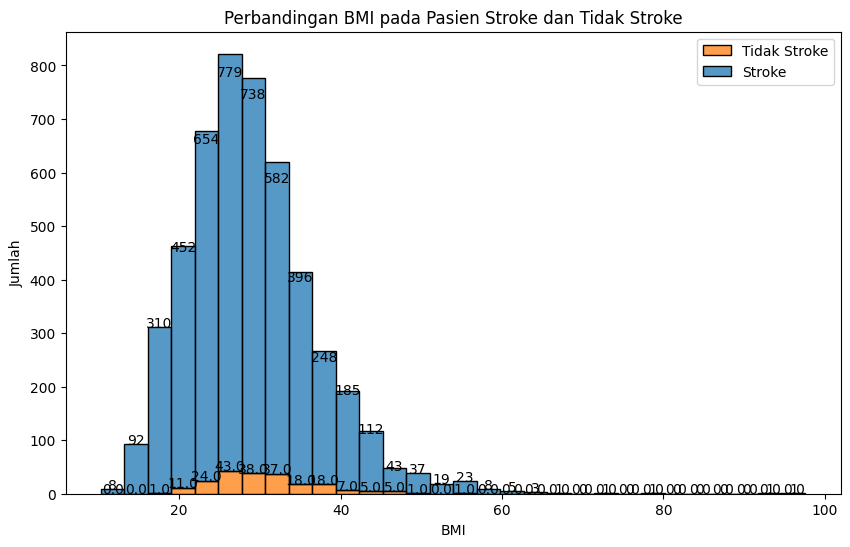

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='bmi', hue='stroke', multiple='stack', bins=30, hue_order=[0, 1])
plt.title('Perbandingan BMI pada Pasien Stroke dan Tidak Stroke')
plt.xlabel('BMI')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Tidak Stroke', 'Stroke'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

plt.show()


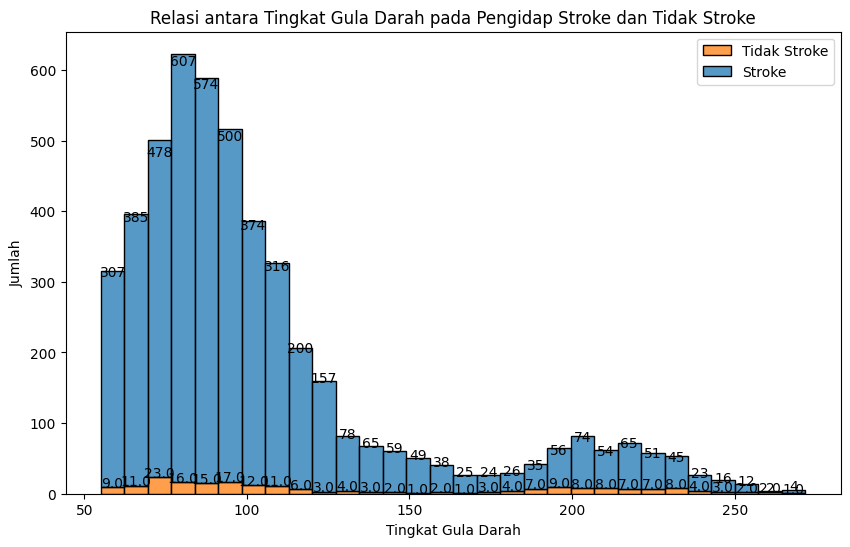

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=data, x='avg_glucose_level', hue='stroke', multiple='stack', bins=30)
plt.title('Relasi antara Tingkat Gula Darah pada Pengidap Stroke dan Tidak Stroke')
plt.xlabel('Tingkat Gula Darah')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Tidak Stroke', 'Stroke'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")


plt.show()

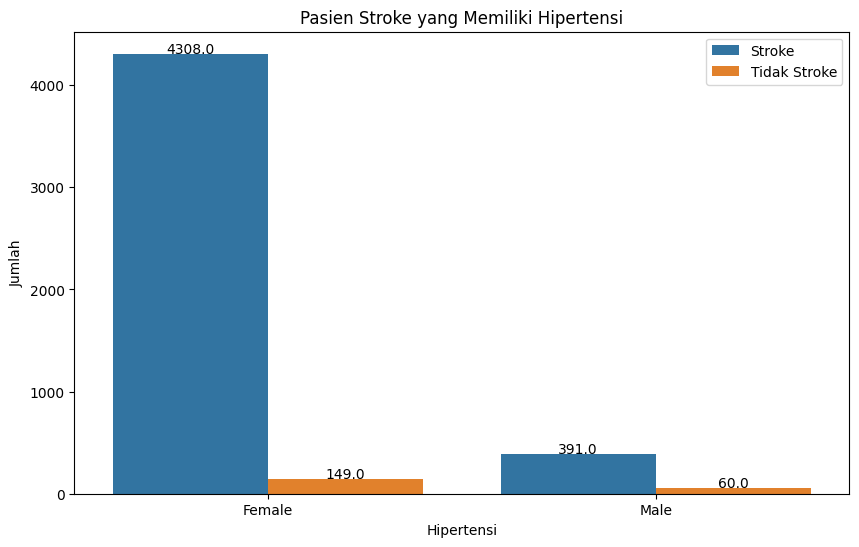

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hypertension', hue='stroke', data=data, hue_order=[0, 1])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Pasien Stroke yang Memiliki Hipertensi')
plt.xlabel('Hipertensi')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Stroke', 'Tidak Stroke'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")


plt.show()

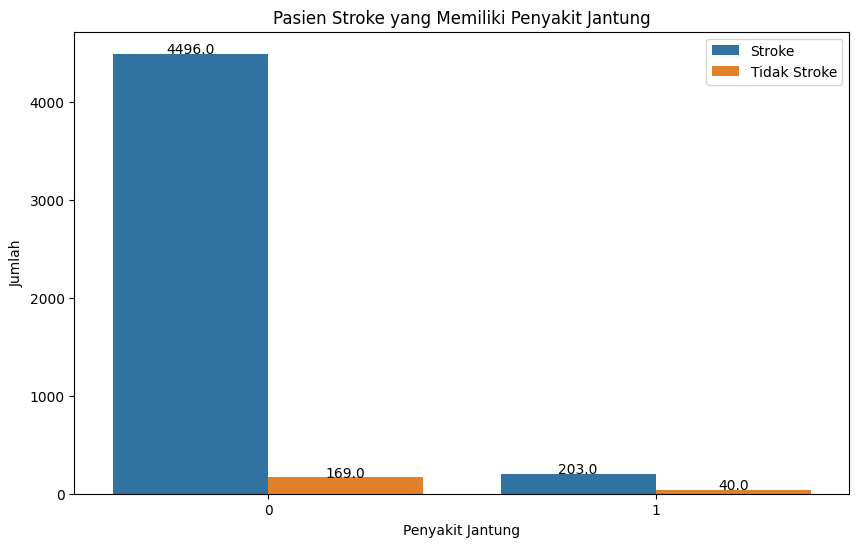

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='heart_disease', hue='stroke', data=data, hue_order=[0, 1])
plt.title('Pasien Stroke yang Memiliki Penyakit Jantung')
plt.xlabel('Penyakit Jantung')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Stroke', 'Tidak Stroke'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")


plt.show()


In [14]:
# Plotting countplot dengan anotasi angka detail untuk pasien stroke
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hypertension_heart_disease', hue='stroke', data=data, hue_order=[0, 1])
plt.title('Pasien Stroke yang Komorbid dengan Hipertensi dan Penyakit Jantung')
plt.xlabel('Hipertensi dan Penyakit Jantung')
plt.ylabel('Jumlah')
plt.legend(loc='upper right', labels=['Stroke', 'Tidak Stroke'])

# Menambahkan anotasi untuk jumlah pasien stroke di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

plt.show()

ValueError: Could not interpret input 'hypertension_heart_disease'

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Menampilkan fitur yang paling penting
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFitur yang paling penting dalam menentukan stroke:")
for i in range(len(indices)):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")


# Menghitung total impor fitur
total_importance = np.sum(importances)

# Menampilkan fitur yang paling penting dalam persentase
print("\nFitur yang paling penting dalam menentukan stroke (dalam persentase):")
for i in range(len(indices)):
    importance_percentage = (importances[indices[i]] / total_importance) * 100
    print(f"{i+1}. {X.columns[indices[i]]}: {importance_percentage:.2f}%")

Akurasi model: 94.60%

Fitur yang paling penting dalam menentukan stroke:
1. avg_glucose_level: 0.2952989746912952
2. bmi: 0.2335629895078429
3. age: 0.2261539714898353
4. smoking_status: 0.06426864209712135
5. work_type: 0.051877280653909716
6. gender: 0.034141919124343494
7. Residence_type: 0.03344570003301987
8. heart_disease: 0.02333077106144159
9. hypertension: 0.023052057983552157
10. ever_married: 0.01486769335763834

Fitur yang paling penting dalam menentukan stroke (dalam persentase):
1. avg_glucose_level: 29.53%
2. bmi: 23.36%
3. age: 22.62%
4. smoking_status: 6.43%
5. work_type: 5.19%
6. gender: 3.41%
7. Residence_type: 3.34%
8. heart_disease: 2.33%
9. hypertension: 2.31%
10. ever_married: 1.49%


In [18]:
# Calculate the number of stroke cases for each smoking status category
stroke_counts = data[data['stroke'] == 1]['smoking_status'].value_counts(dropna=False)
non_stroke_counts = data[data['stroke'] == 0]['smoking_status'].value_counts(dropna=False)

# Combine the counts into a DataFrame for comparison
stroke_comparison = pd.DataFrame({
    'Stroke': stroke_counts,
    'No Stroke': non_stroke_counts
}).fillna(0)  # Fill NaNs with 0 for any missing categories

# Display the comparison
stroke_comparison


,Stroke,No Stroke
0,84,1768
1,57,779
2,39,698
3,29,1454
